In [985]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [986]:
data = pd.read_csv("unlabeled.csv")
print(data)

        x1     x2
0   -0.187  0.747
1    2.824  0.377
2    0.713  0.766
3    1.635  1.846
4    2.711  1.996
..     ...    ...
995  1.990  1.367
996 -1.557 -1.412
997 -1.033 -0.726
998 -0.195  0.531
999 -2.534 -1.977

[1000 rows x 2 columns]


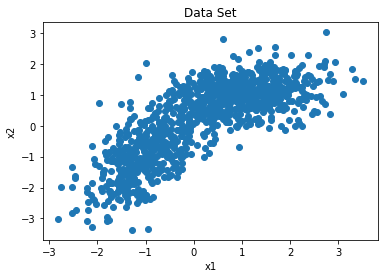

In [987]:
#Extracting the data
X = data[["x1", "x2"]].values
X_1 = X[:, 0]
X_2 = X[:, 1]
plt.scatter(X_1, X_2)
plt.title("Data Set")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [988]:
#In the expectation step we calculate the gammas/posteriors for use in the maximization step.
def expectation_step(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, X):
    Likely_1 = (st.multivariate_normal(mu_1, Sigma_1).pdf(X)).reshape(-1,1)  #The jth row element is the likelihood P(x^j|z^j_1 =1)
    Likely_2 = (st.multivariate_normal(mu_2, Sigma_2).pdf(X)).reshape(-1,1)  #The jth row element is the likelihood P(x^j|z^j_2 =2)
    Likelihoods = np.concatenate([pi_1*Likely_1, pi_2*Likely_2], axis = 1) 
    #print(Likelihoods.shape)
    Gammas = Likelihoods/((np.sum(Likelihoods, axis = 1)).reshape(-1,1)) #The jth row ith element will now have gamma(z^{(j)}_i)
    #print(Gammas)
    return Gammas


In [989]:
#In the maximization step we calculate the new values for the parameters
def maximization_step(pi_1_old, pi_2_old, mu_1_old, mu_2_old, Sigma_1_old, Sigma_2_old, X, Gammas):
    mu_1 = X.T@Gammas[:, 0]/np.sum(Gammas[:,0])
    mu_2 = X.T@Gammas[:, 1]/np.sum(Gammas[:, 1])
    #Got tired of vectorizing at this point
    #A_1 = X.T - (mu_1).reshape(-1,1)
    #A_2 = X.T - (mu_2).reshape(-1,1)
    #B_1 = np.squeeze([Gammas[i, 0]*A_1[:, i] for i in range(len(X[:,0]))]).T
    #B_2 = np.squeeze([Gammas[i, 1]*A_2[:, i] for i in range(len(X[:,1]))]).T
    #Sigma_1 = B_1@A_1.T
    #Sigma_2 = B_2@A_2.T
    #for i in range(0, len(X[:,0])):
        #Y = X.T
        #D_1 = np.zero((len(X[:,0]), len(X[:, 0])))
        #row, col = np.diag_indices(len(X[:,0]))
        #D_1[row, col] = Gammas[:,0]
        #D_2 = np.zero((len(X[:,1]), len(X[:,1])))
        #D_2[row, col] = Gammas[:,1]
        #A = X.T[:, i] - mu_1
        #B = X.T[:, i] - mu_2
        #Sigma_1 = (Sigma_1) + Gammas[i, 0]*(A@A.T)
        #Sigma_2 = (Sigma_2) + Gammas[i, 1]*(B@B.T)
        #Sigma_1 = Sigma_1 + Gammas[i, 0]*((X.T[:, i] - mu_1)@((X.T[:, i] - mu_1).T))
        #Sigma_2 = Sigma_2 + Gammas[i, 1]*((X.T[:, i] - mu_2)@((X.T[:, i] - mu_2).T))
    #Sigma_1 = Sigma_1/(np.sum(Gammas[:, 0]))
    #Sigma_2 = Sigma_2/(np.sum(Gammas[:, 1]))
    pi_1 = (np.sum(Gammas[:, 0]))/len(X[:, 0])
    pi_2 = (np.sum(Gammas[:, 1]))/len(X[:, 1])
    N = len(X[:, 0])
    centered_vects_1 = X.T - (mu_1).reshape(-1,1)
    centered_vects_2 = X.T - (mu_2).reshape(-1,1)
    D_1 = np.zeros((N,N))
    np.fill_diagonal(D_1, Gammas[:, 0])
    D_2 = np.zeros((N, N))
    np.fill_diagonal(D_2, Gammas[:, 1])
    Sigma_1 = ((centered_vects_1@D_1)@(centered_vects_1.T))/np.sum(Gammas[:, 0])
    Sigma_2 = ((centered_vects_2@D_2)@(centered_vects_2.T))/np.sum(Gammas[:, 1])
    return pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2



In [990]:
#We also calculate the (expected) log loss to keep track of how well we're doing
def expected_log_loss(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2,X,Gammas):
    #Likely_1 = (st.multivariate_normal(mu_1, Sigma_1).pdf(X)).reshape(-1,1)
    #Likely_2 = (st.multivariate_normal(mu_2, Sigma_2).pdf(X)).reshape(-1,1)
    #Log_Likelihoods = np.log(np.concatenate([pi_1*Likely_1, pi_2*Likely_2], axis = 1))
    #print("Likely_1")
    #print(Likely_1)
    #print(np.amax(Likely_1))
    #print("Likely_1 end")
    #print("LL")
    #print(Log_Likelihoods)
    #print("G")
    #print(Gammas)
    #Loss = np.sum(Gammas@Log_Likelihoods.T)
    #print("Please do't be big")
    #print(Loss)
    pis = [pi_1, pi_2]
    Likely_1 = (st.multivariate_normal(mu_1, Sigma_1).pdf(X)).reshape(-1,1)
    Likely_2 = (st.multivariate_normal(mu_2, Sigma_2).pdf(X)).reshape(-1,1)
    Log_Likelihoods = np.log(np.concatenate([Likely_1, Likely_2], axis = 1))
    Log_Loss = np.sum(Log_Likelihoods@pis)
    return Log_Loss
    return Loss



In [991]:
def trainer(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, X, stop_crit):
    exp_log_likelies = []
    i = 0
    while True:
        print(i)
        i = i+1
        Gammas = expectation_step(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, X)
        exp_log_likelies.append(expected_log_loss(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, X, Gammas))
        if ((len(exp_log_likelies) > 2 and (np.abs(exp_log_likelies[-1] - exp_log_likelies[-2]) < stop_crit))):
            break
        pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2 = maximization_step(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, X, Gammas)
    return pi_2, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, exp_log_likelies


In [992]:
#Initializing with random values
pi_1 = np.random.uniform(0,1)
pi_2 = 1-pi_1
mu_1 = np.random.normal(0, 1, size = (2,))
mu_2 = np.random.normal(0, 1, size = (2,))
A_1 = np.random.normal(0, 1, size = (2,2))
A_2 = np.random.normal(0, 1, size = (2,2))
Sigma_1 = np.dot(A_1, A_1.transpose())
Sigma_2 = np.dot(A_2,A_2.transpose())
print(mu_1)
print(mu_2)
print(Sigma_1)
print(Sigma_2)

[0.20694559 0.71594548]
[-0.59821842 -1.24871878]
[[1.05989699 0.73645738]
 [0.73645738 1.09838498]]
[[7.52739626 2.58294775]
 [2.58294775 1.79804759]]


In [993]:
pi_2, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, exp_log_likelies = trainer(pi_1, pi_2, mu_1, mu_2, Sigma_1, Sigma_2, X, 0.001)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


In [994]:
print(exp_log_likelies[-1])

-5504.314361150822


SyntaxError: invalid syntax (<ipython-input-701-a68fb704b250>, line 5)